# Analysis of MNE Epoch Preprocessing Steps

Baseline correction, filtering, and thresholding are performed

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import mne

from Cho2017 import SubjectData

plt.rcParams['figure.figsize'] = [12, 8]

In [2]:
subject = SubjectData('Cho2017-Data/s01.mat')
imagery_events = mne.find_events(subject.raw_imagery_left, stim_channel=subject.stim_channel)   # Same stim for imagery l/r

100 events found
Event IDs: [1]


## Visualize the raw data

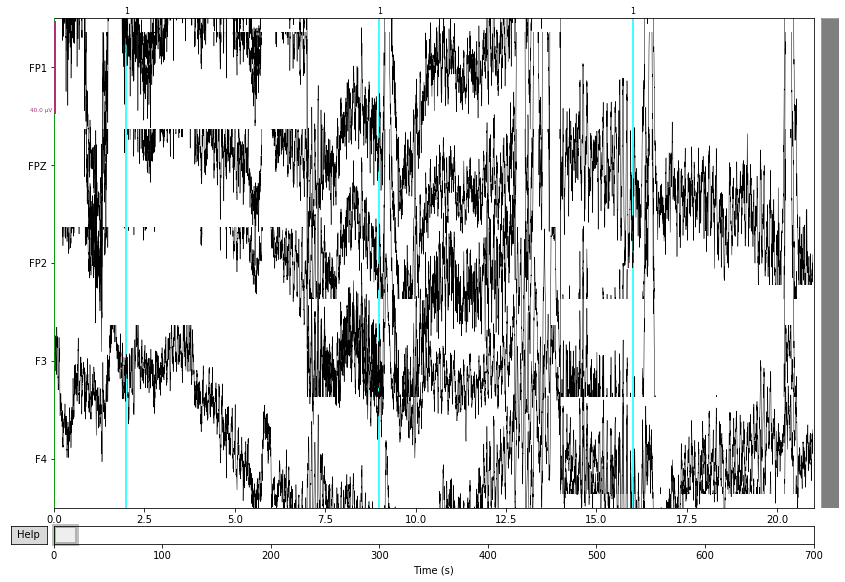

In [3]:
picks = ['FP1', 'FPZ', 'FP2', 'F3', 'F4'] # None / ['eeg'] for first 20 channels or list of channel names for those specified channels
subject.raw_imagery_left.copy().pick(picks).plot(events=imagery_events, start=0, duration=21);

## Epoch object without any correction

100 events found
Event IDs: [1]
Not setting metadata
Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Loading data for 100 events and 3585 original time points ...
1 bad epochs dropped


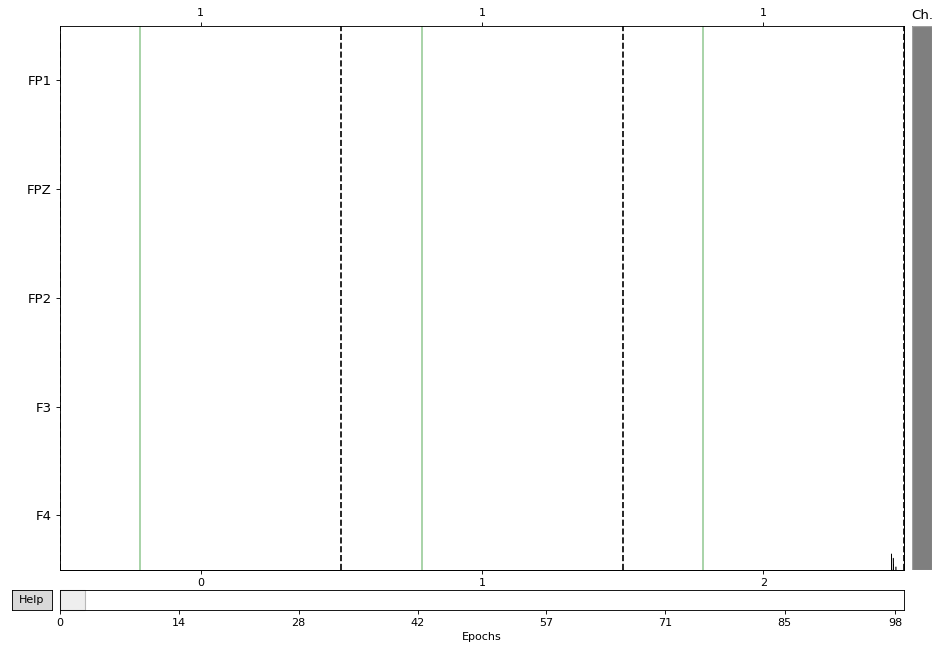

In [4]:
tmin = -2
tmax = 5
imagery_events = mne.find_events(subject.raw_imagery_left, stim_channel=subject.stim_channel)   # Same stim for imagery l/r
im_left_epochs = mne.Epochs(subject.raw_imagery_left, imagery_events, tmin=tmin, tmax=tmax, picks=picks, baseline=None, reject=None, preload=True)
im_left_epochs.plot(n_epochs=3);

## Epochs with Baseline Correction Applied

Baseline correction defaults to subtracting out the average signal from the start of the epoch (tmin) to the stimulus start (0s).

Not setting metadata
Not setting metadata
100 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 100 events and 3585 original time points ...
1 bad epochs dropped


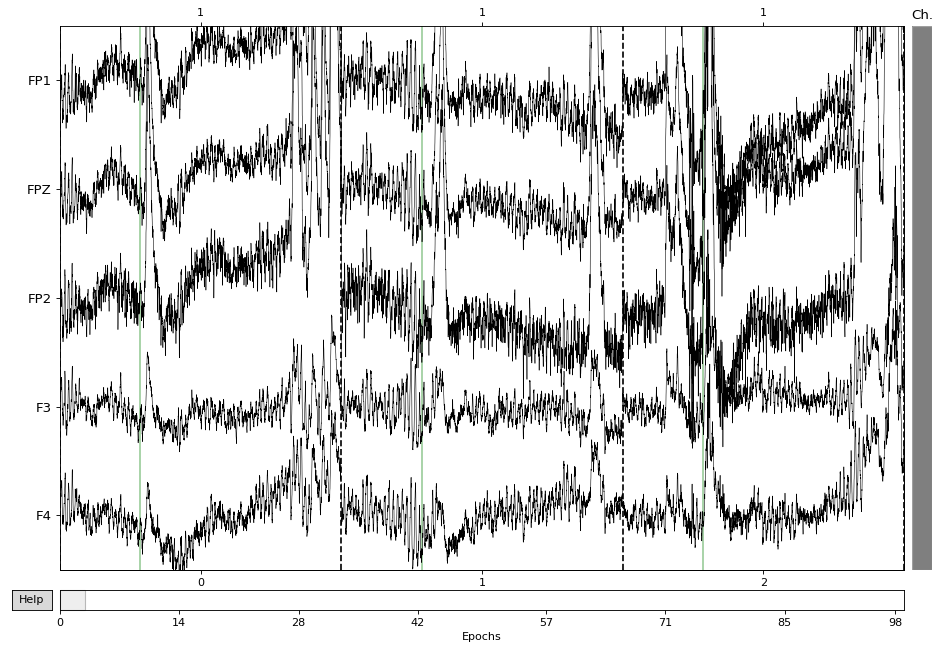

In [5]:
im_left_epochs = mne.Epochs(subject.raw_imagery_left, imagery_events, tmin=tmin, tmax=tmax, picks=picks, reject=None, preload=True)
im_left_epochs.plot(n_epochs=3);

## Epochs with Baseline Correction and Bandpass Filter Applied

Not setting metadata
Not setting metadata
100 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 100 events and 3585 original time points ...
1 bad epochs dropped
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 845 samples (1.650 sec)



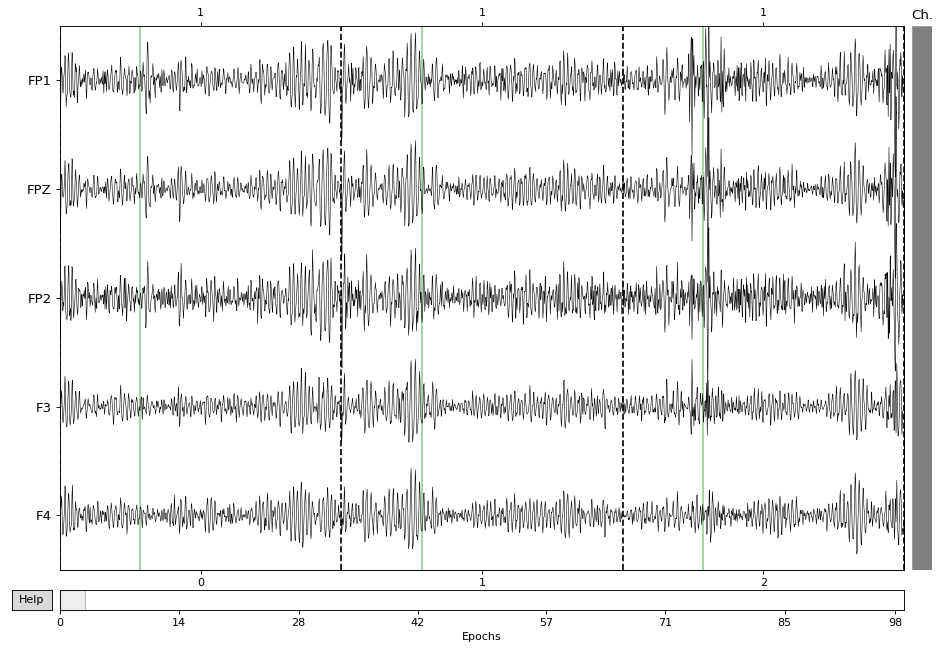

In [6]:
filter_freqs = (8, 30)
filter_props = dict(picks=['eeg'], fir_design='firwin', skip_by_annotation='edge')
im_left_epochs = mne.Epochs(subject.raw_imagery_left, imagery_events, tmin=tmin, tmax=tmax, picks=picks, reject=None, preload=True).filter(*filter_freqs, **filter_props)
im_left_epochs.plot(n_epochs=3);

## Dropping bad, post-filtered epochs using a threshold

Not setting metadata
Not setting metadata
100 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 100 events and 3585 original time points ...
1 bad epochs dropped
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 845 samples (1.650 sec)

    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP1']
    Rejecting  epoch based on EEG : ['FP1']
    Rejecting  epoch based on EEG : ['FP2', 'F4']
    Rejecting  epoc

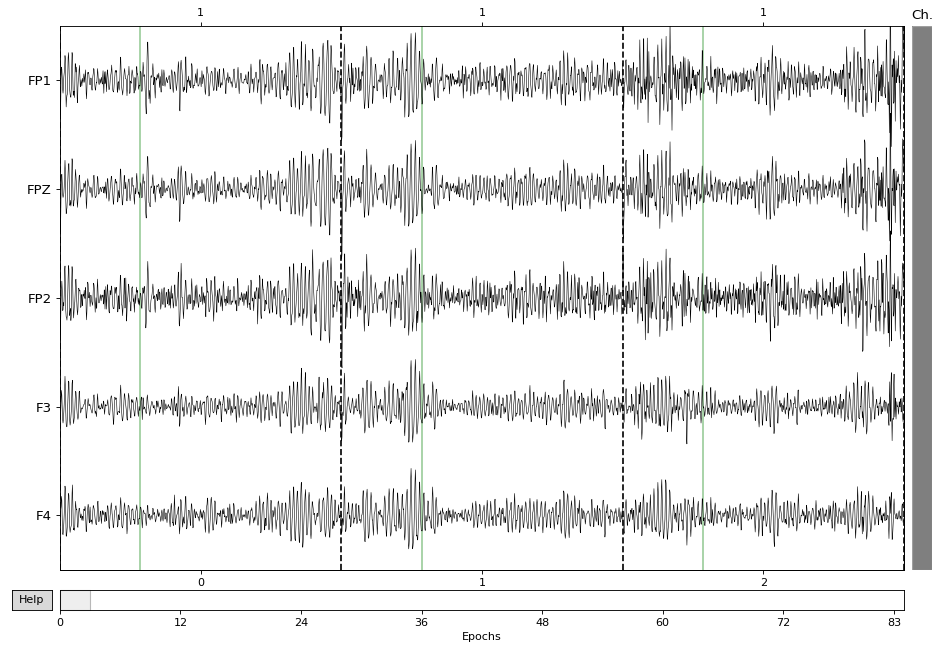

In [7]:
reject_criteria = {'eeg': 150e-6}     # Rejection criteria used by Cho 2017
im_left_epochs = mne.Epochs(subject.raw_imagery_left, imagery_events, tmin=tmin, tmax=tmax, picks=picks, reject=None,
                            preload=True).filter(*filter_freqs, **filter_props).drop_bad(reject=reject_criteria)
print(im_left_epochs.drop_log)
im_left_epochs.plot(n_epochs=3);

## Crop baseline-corrected and filtered epochs to a timescale we care about

Not setting metadata
Not setting metadata
100 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 100 events and 3585 original time points ...
1 bad epochs dropped
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 845 samples (1.650 sec)

    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP1']
    Rejecting  epoch based on EEG : ['FP1']
    Rejecting  epoch based on EEG : ['FP2', 'F4']
    Rejecting  epoc

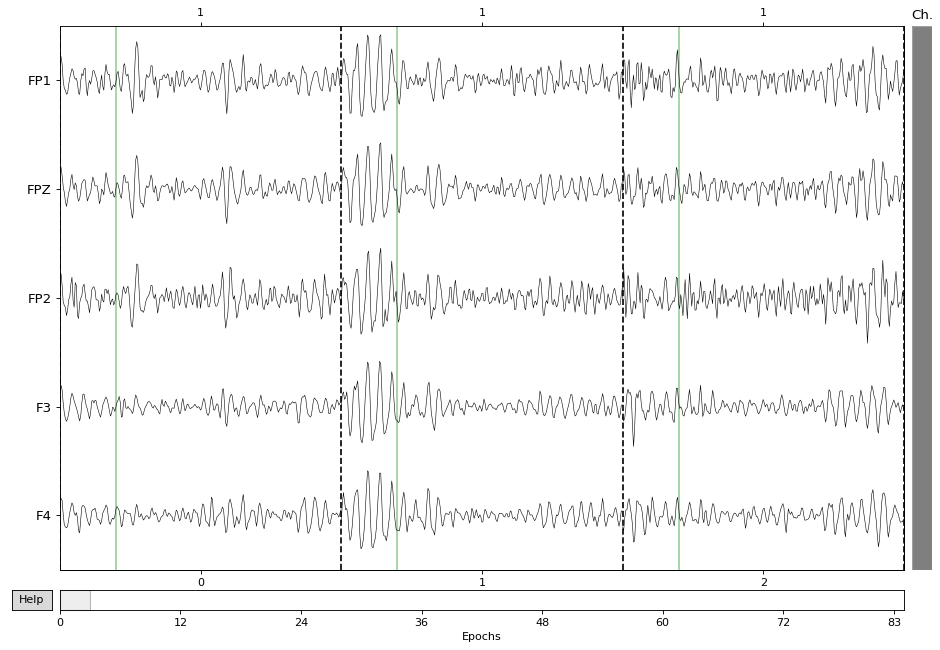

In [8]:
crop_tmin = -0.5
crop_tmax = 2
im_left_epochs = mne.Epochs(subject.raw_imagery_left, imagery_events, tmin=tmin, tmax=tmax, picks=picks, reject=None,
                            preload=True).filter(*filter_freqs, **filter_props).drop_bad(reject=reject_criteria).crop(tmin=crop_tmin, tmax=crop_tmax)
im_left_epochs.plot(n_epochs=3);